---

# Exploratory Data Analysis

In this .ipynb, we will analyze the data that we have currently and analyze it to understand our data better and create a model suited for the usage.

---

## Importing Modules

In [97]:
import pandas as pd  # Manipulasi dan analisis data tabular
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [37]:
data = pd.read_csv("dataset\P2_FinPro_Final_Record.csv")

In [38]:
data.head(10)

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,work_phone,phone,email,family_size,status,start_date,snapshot_month,months_balance,credit_status,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,X,2021-09-01,2021-09-01,0,NPL,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,0,2021-09-01,2021-10-01,-1,NPL,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,1,2021-09-01,2021-11-01,-2,NPL,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2021-12-01,-3,NPL,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-01-01,-4,NPL,1
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-02-01,-5,NPL,1
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-03-01,-6,NPL,1
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-04-01,-7,NPL,1
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-05-01,-8,NPL,1
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-06-01,-9,NPL,1


In [31]:
data.describe()

,id,child_number,income,days_birth,days_employed,mobile_phone,work_phone,phone,email,family_size,months_balance,target
count,7.775470e+05,777547.000000,7.775470e+05,777547.000000,777547.000000,777547.0,777547.000000,777547.000000,777547.000000,777547.000000,777547.000000,777547.000000
mean,5.078753e+06,0.428172,1.885509e+05,-16124.221404,57764.129957,1.0,0.231838,0.301027,0.091695,2.208947,-15.377747,0.140701
std,4.180254e+04,0.745809,1.016255e+05,4104.141492,136461.382677,0.0,0.422006,0.458705,0.288595,0.907422,12.636282,0.347714
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.044633e+06,0.000000,1.215000e+05,-19452.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-23.000000,0.000000
50%,5.069532e+06,0.000000,1.620000e+05,-15759.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-12.000000,0.000000
75%,5.115552e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-5.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [32]:
print(data.columns)

Index(['id', 'gender', 'car', 'realty', 'child_number', 'income', 'occupation',
       'education', 'marital_status', 'house_type', 'days_birth',
       'days_employed', 'mobile_phone', 'work_phone', 'phone', 'email',
       'family_size', 'status', 'start_date', 'snapshot_month',
       'months_balance', 'credit_status', 'target'],
      dtype='object')


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777547 entries, 0 to 777546
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              777547 non-null  int64  
 1   gender          777547 non-null  object 
 2   car             777547 non-null  object 
 3   realty          777547 non-null  object 
 4   child_number    777547 non-null  int64  
 5   income          777547 non-null  float64
 6   occupation      777547 non-null  object 
 7   education       777547 non-null  object 
 8   marital_status  777547 non-null  object 
 9   house_type      777547 non-null  object 
 10  days_birth      777547 non-null  int64  
 11  days_employed   777547 non-null  int64  
 12  mobile_phone    777547 non-null  int64  
 13  work_phone      777547 non-null  int64  
 14  phone           777547 non-null  int64  
 15  email           777547 non-null  int64  
 16  family_size     777547 non-null  float64
 17  status    

___

## EDA 1 Creditworthiness & Risk Profile

### 1.1 Approved vs Declined Credit Applications

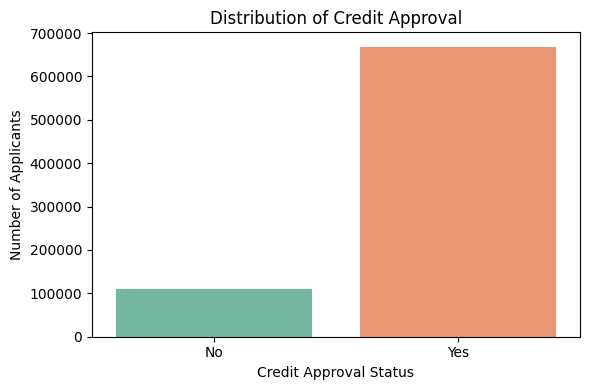

In [7]:
Credit_Approval = data["credit_approval"].value_counts()

plt.figure(figsize = (6,4))
sns.countplot(x = "credit_approval", data = data, palette = "Set2")
plt.title("Distribution of Credit Approval")
plt.xlabel("Credit Approval Status")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()

### 1.2. Approval by Age

In [8]:
data["age"] = (-data["days_birth"]) // 365

display(data["age"])

0         32
1         32
2         32
3         32
4         32
          ..
777710    25
777711    25
777712    25
777713    25
777714    25
Name: age, Length: 777715, dtype: int64

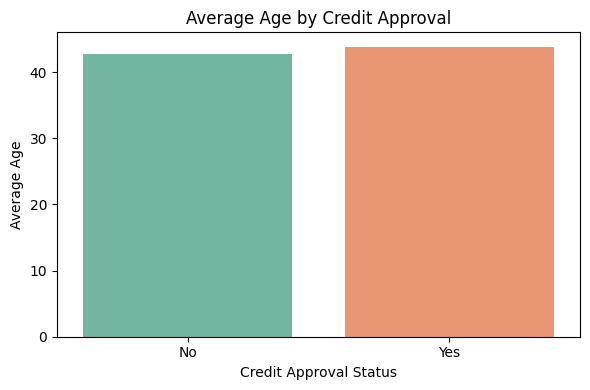

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x='credit_approval', y='age', data=data, estimator='mean', ci=None, palette='Set2')

plt.title('Average Age by Credit Approval')
plt.xlabel('Credit Approval Status')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()

### 1.3. Years Employed vs Credit Approval Status

In [10]:
data['years_employed'] = data['days_employed'].apply(lambda x: 0 if x == 365243 else -x // 365)

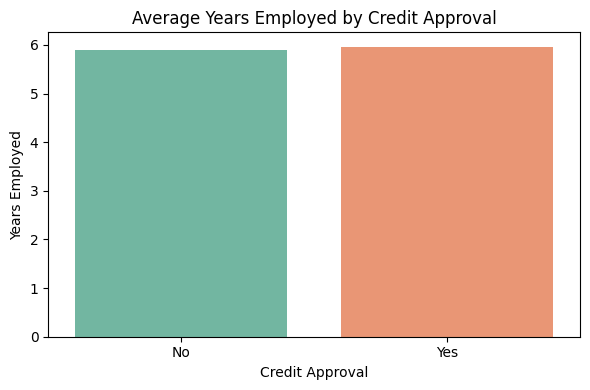

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x='credit_approval', y='years_employed', data=data, estimator='mean', ci=None, palette='Set2')
plt.title('Average Years Employed by Credit Approval')
plt.xlabel('Credit Approval')
plt.ylabel('Years Employed')
plt.tight_layout()
plt.show()

### 1.5. Car Ownership / House Ownership vs Credit Approval

In [12]:
print(data['car'].value_counts())
print(data['realty'].value_counts())

car
N    473355
Y    304360
Name: count, dtype: int64
realty
Y    512948
N    264767
Name: count, dtype: int64


In [13]:
car_approval = data.groupby('car')['credit_approval'].value_counts(normalize=True).unstack()
print("Approval rates by car ownership:\n", car_approval)

Approval rates by car ownership:
 credit_approval        No       Yes
car                                
N                0.144099  0.855901
Y                0.135892  0.864108


In [14]:
realty_approval = data.groupby('realty')['credit_approval'].value_counts(normalize=True).unstack()
print("Approval rates by realty ownership:\n", realty_approval)

Approval rates by realty ownership:
 credit_approval        No       Yes
realty                             
N                0.155824  0.844176
Y                0.133177  0.866823


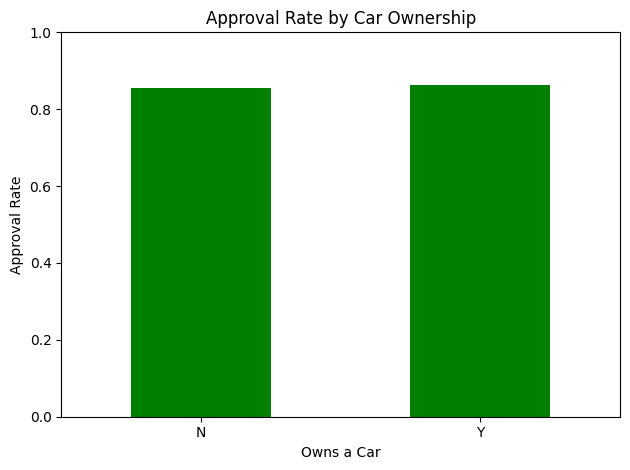

In [15]:
car_approval["Yes"].plot(kind='bar', color='green')
plt.title('Approval Rate by Car Ownership')
plt.xlabel('Owns a Car')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

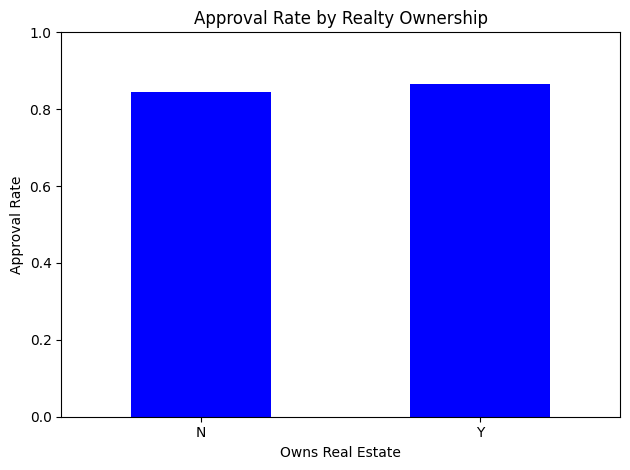

In [16]:
realty_approval["Yes"].plot(kind='bar', color='blue')
plt.title('Approval Rate by Realty Ownership')
plt.xlabel('Owns Real Estate')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### 1.6. Occupation vs Credit Acceptance

In [17]:
print(data['target'].unique())
print(data['occupation'].unique())

[1 0]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']


In [18]:
default_rates = data.groupby('occupation')['target'].mean().sort_values()
print(default_rates)

occupation
Student                 0.044510
Pensioner               0.127586
Working                 0.140462
State servant           0.145850
Commercial associate    0.149532
Name: target, dtype: float64


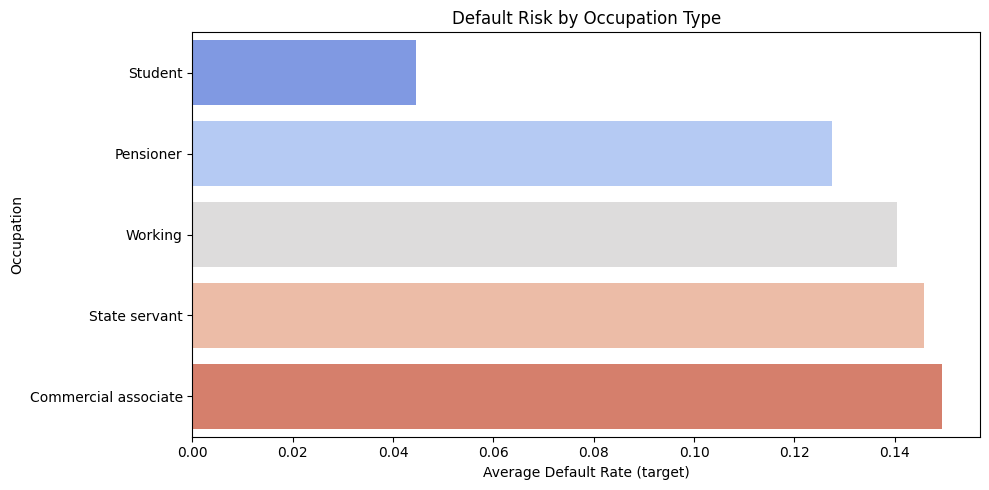

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=default_rates.values, y=default_rates.index, palette='coolwarm')
plt.title('Default Risk by Occupation Type')
plt.xlabel('Average Default Rate (target)')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

In [20]:
occupation_counts = data['occupation'].value_counts()
summary = data.groupby('occupation')['target'].agg(['mean', 'count']).sort_values(by='mean')
print(summary)

                          mean   count
occupation                            
Student               0.044510     337
Pensioner             0.127586  128392
Working               0.140462  400164
State servant         0.145850   65437
Commercial associate  0.149532  183385


___

## EDA 2 Demographic & Household Analysis

### 2.1. Which gender dominates the applicant pool, and does that affect approval rates?

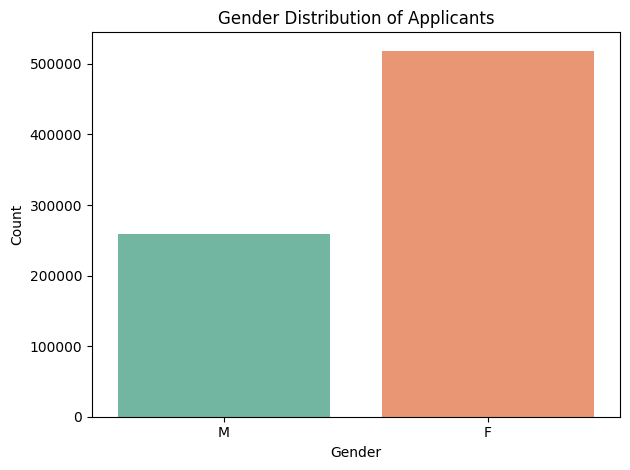

gender
F    0.667148
M    0.332852
Name: proportion, dtype: float64


In [21]:
# Countplot
sns.countplot(x='gender', data=data, palette='Set2')
plt.title('Gender Distribution of Applicants')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print proportions
print(data['gender'].value_counts(normalize=True))

In [22]:
approval_by_gender = data.groupby('gender')['credit_approval'].value_counts(normalize=True).unstack()
print("Approval rates by gender:\n", approval_by_gender)

Approval rates by gender:
 credit_approval        No       Yes
gender                             
F                0.135490  0.864510
M                0.151705  0.848295


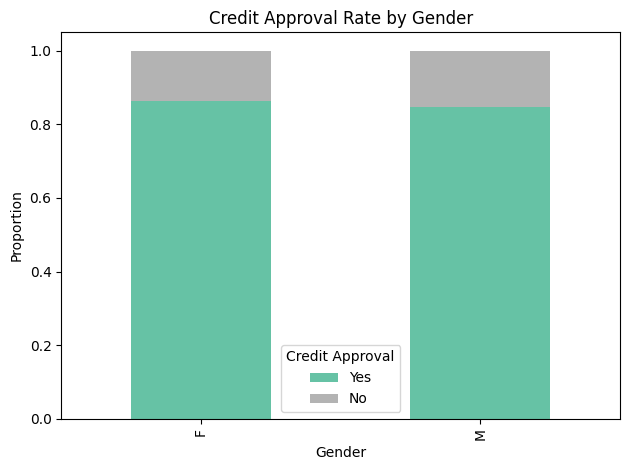

In [23]:
approval_by_gender[["Yes", "No"]].plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Credit Approval Rate by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Credit Approval')
plt.tight_layout()
plt.show()

### 2.2. Do marital status or family size impact credit approval or target outcomes?

#### 2.2.1. Martial Status

In [24]:
approval_by_marital = data.groupby('marital_status')['credit_approval'].value_counts(normalize=True).unstack()
print(approval_by_marital)

credit_approval             No       Yes
marital_status                          
Civil marriage        0.148752  0.851248
Married               0.137183  0.862817
Separated             0.128494  0.871506
Single / not married  0.159156  0.840844
Widow                 0.153318  0.846682


In [25]:
default_by_marital = data.groupby('marital_status')['target'].mean().sort_values()
print(default_by_marital)

marital_status
Separated               0.128494
Married                 0.137183
Civil marriage          0.148752
Widow                   0.153318
Single / not married    0.159156
Name: target, dtype: float64


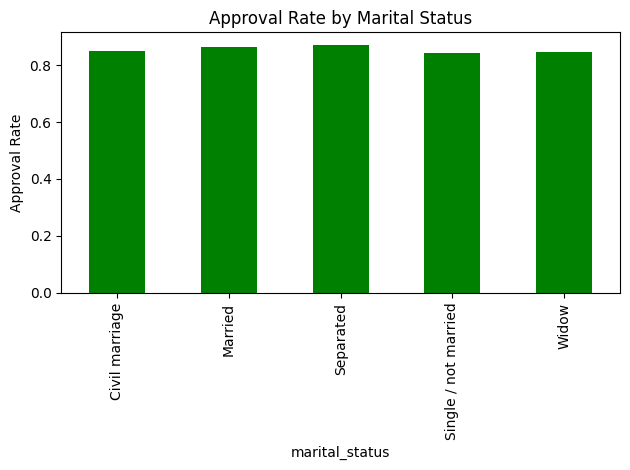

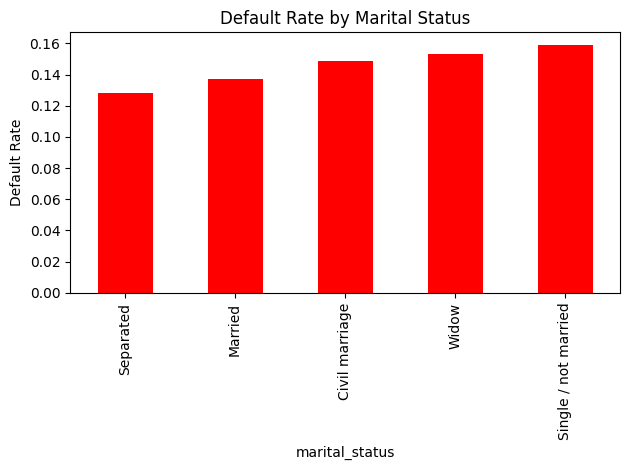

In [26]:
# Approval Rate
approval_by_marital['Yes'].plot(kind='bar', color='green', title='Approval Rate by Marital Status')
plt.ylabel('Approval Rate')
plt.tight_layout()
plt.show()

# Default Risk
default_by_marital.plot(kind='bar', color='red', title='Default Rate by Marital Status')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

#### 2.2.2. Family Size

In [27]:
data['family_size_group'] = pd.cut(data['family_size'], bins=[0,1,2,3,5,10], labels=['1','2','3','4-5','6+'])

In [28]:
# Credit approval rate by family size
approval_by_family = data.groupby('family_size_group')['credit_approval'].value_counts(normalize=True).unstack()
# Default risk by family size
default_by_family = data.groupby('family_size_group')['target'].mean()

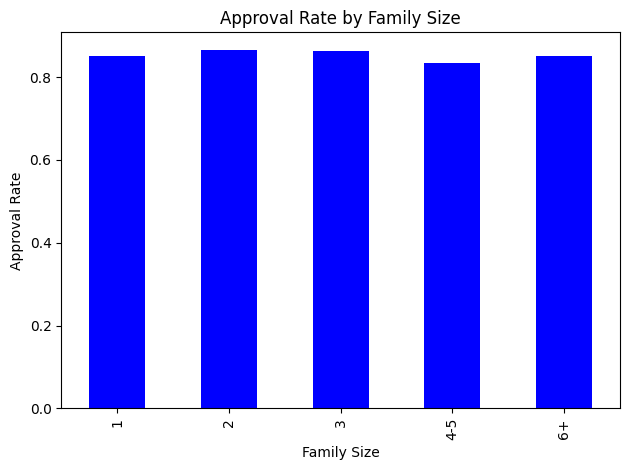

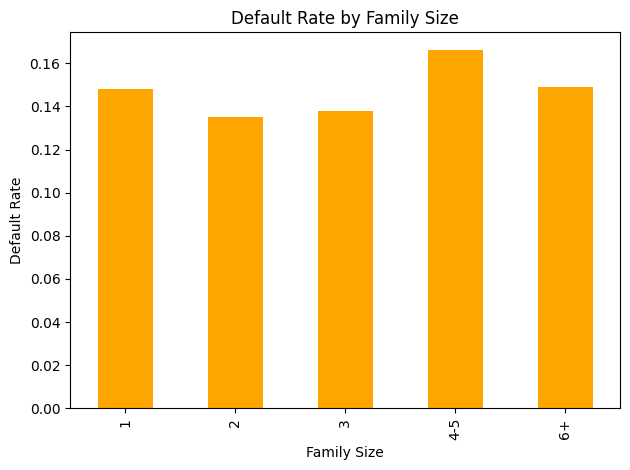

In [29]:
# Approval rate plot
approval_by_family['Yes'].plot(kind='bar', color='blue', title='Approval Rate by Family Size')
plt.ylabel('Approval Rate')
plt.xlabel('Family Size')
plt.tight_layout()
plt.show()

# Default rate plot
default_by_family.plot(kind='bar', color='orange', title='Default Rate by Family Size')
plt.ylabel('Default Rate')
plt.xlabel('Family Size')
plt.tight_layout()
plt.show()

### 2.3. Are customers with children more likely to default or be denied?

In [30]:
data['has_children'] = data['child_number'] > 0

In [31]:
approval_by_children = data.groupby('has_children')['credit_approval'].value_counts(normalize=True).unstack()
print(approval_by_children)

credit_approval        No       Yes
has_children                       
False            0.137756  0.862244
True             0.148028  0.851972


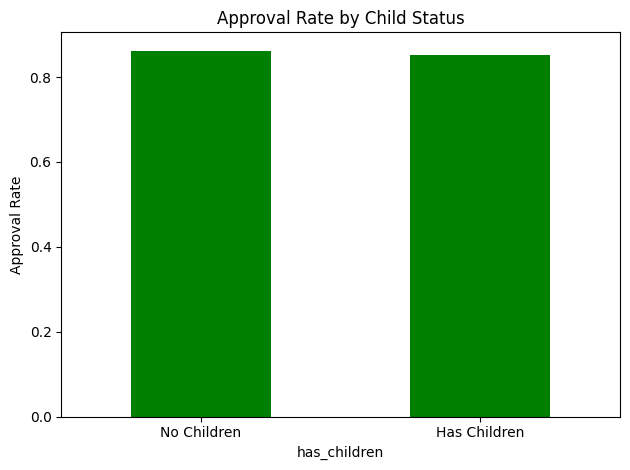

In [32]:
approval_by_children['Yes'].plot(kind='bar', color='green', title='Approval Rate by Child Status')
plt.xticks([0, 1], ['No Children', 'Has Children'], rotation=0)
plt.ylabel('Approval Rate')
plt.tight_layout()
plt.show()

In [33]:
default_by_children = data.groupby('has_children')['target'].mean()
print(default_by_children)

has_children
False    0.137756
True     0.148028
Name: target, dtype: float64


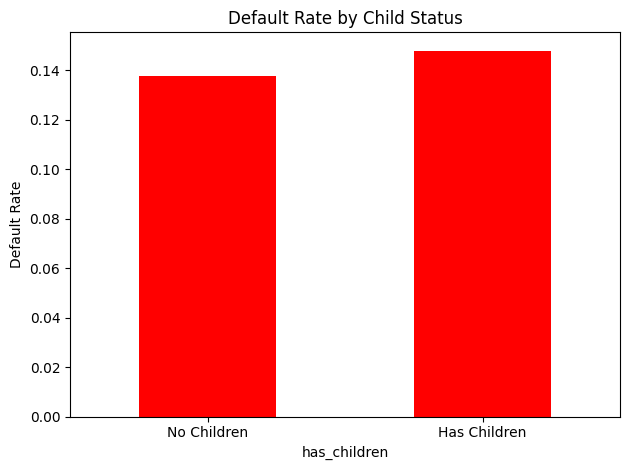

In [34]:
default_by_children.plot(kind='bar', color='red', title='Default Rate by Child Status')
plt.xticks([0, 1], ['No Children', 'Has Children'], rotation=0)
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

### 2.4. What is the average age of applicants? How does age correlate with approval?

In [35]:
average_age = data['age'].mean()
print(f"Average age of applicants: {average_age:.1f} years")

Average age of applicants: 43.7 years


In [36]:
# Convert approval to numeric
data['approval_numeric'] = data['credit_approval'].map({'Yes': 1, 'No': 0})
correlation = data[['age', 'approval_numeric']].corr().loc['age', 'approval_numeric']
print(f"Correlation between age and approval: {correlation:.3f}")

Correlation between age and approval: 0.032


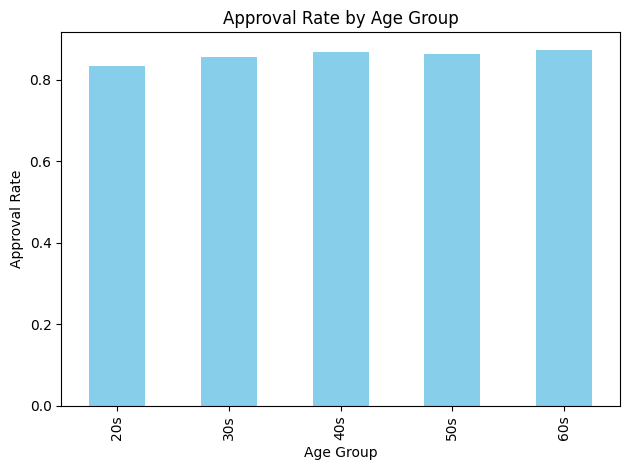

In [37]:
data['age_group'] = pd.cut(data['age'], bins=[20,30,40,50,60,70], labels=['20s','30s','40s','50s','60s'])

approval_by_age = data.groupby('age_group')['approval_numeric'].mean()

approval_by_age.plot(kind='bar', color='skyblue', title='Approval Rate by Age Group')
plt.ylabel('Approval Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

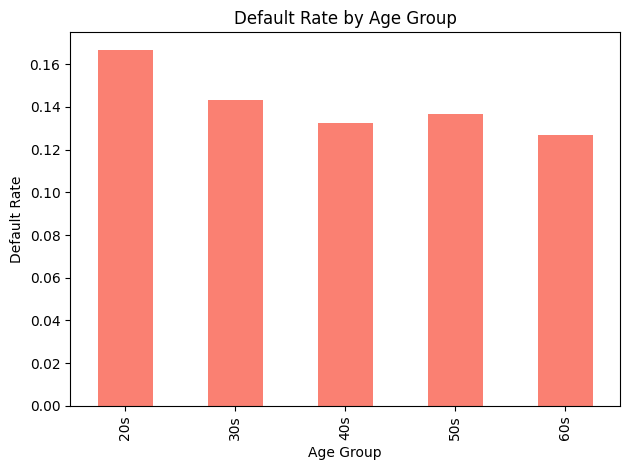

In [38]:
data.groupby('age_group')['target'].mean().plot(kind='bar', color='salmon', title='Default Rate by Age Group')
plt.ylabel('Default Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

### 2.5. Do single vs. married applicants show different patterns of repayment?

In [39]:
data['marital_status'].value_counts()

marital_status
Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: count, dtype: int64

In [40]:
data['marital_group'] = data['marital_status'].replace({
    'Single / not married': 'Single',
    'Civil marriage': 'Married',
    'Separated': 'Other',
    'Widow': 'Other',
    'Widowed': 'Other'
})

In [41]:
default_by_marital = data.groupby('marital_group')['target'].mean().sort_values()
print(default_by_marital)

marital_group
Married    0.138333
Other      0.138617
Single     0.159156
Name: target, dtype: float64


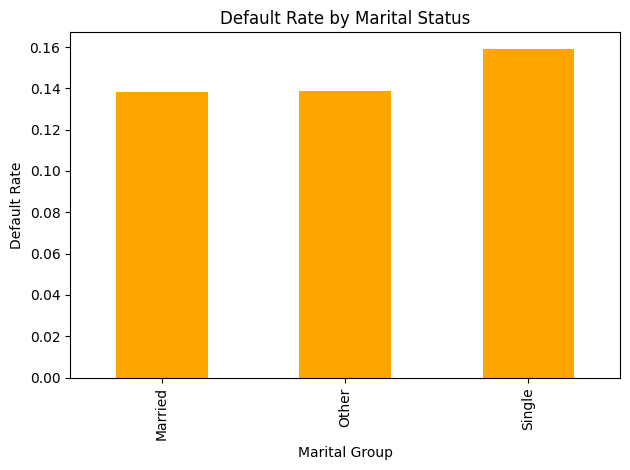

In [42]:
default_by_marital.plot(kind='bar', color='orange')
plt.title('Default Rate by Marital Status')
plt.ylabel('Default Rate')
plt.xlabel('Marital Group')
plt.tight_layout()
plt.show()

In [43]:
summary = data.groupby('marital_group')['target'].agg(['mean', 'count']).sort_values(by='mean')
print(summary)

                   mean   count
marital_group                  
Married        0.138333  606961
Other          0.138617   76419
Single         0.159156   94335


___

## EDA 3 Housing & Lifestyle Patterns

### 3.1. What house types are most common among applicants, and how do they relate to approval?

In [44]:
house_counts = data['house_type'].value_counts()
print(house_counts)

house_type
House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: count, dtype: int64


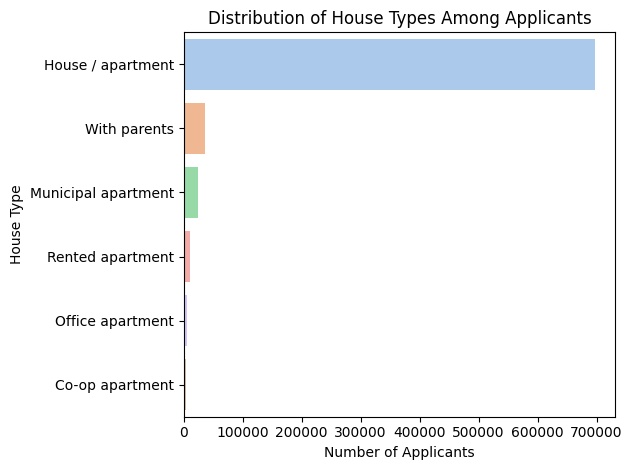

In [45]:
sns.countplot(data=data, y='house_type', order=house_counts.index, palette='pastel')
plt.title('Distribution of House Types Among Applicants')
plt.xlabel('Number of Applicants')
plt.ylabel('House Type')
plt.tight_layout()
plt.show()

In [46]:
approval_by_house = data.groupby('house_type')['credit_approval'].value_counts(normalize=True).unstack()
print(approval_by_house)

credit_approval            No       Yes
house_type                             
Co-op apartment      0.132695  0.867305
House / apartment    0.139333  0.860667
Municipal apartment  0.156696  0.843304
Office apartment     0.176721  0.823279
Rented apartment     0.170031  0.829969
With parents         0.146607  0.853393


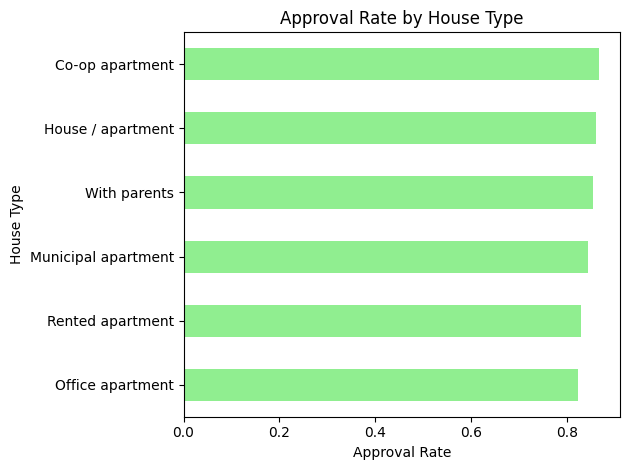

In [47]:
# Approval rate only
approval_by_house['Yes'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Approval Rate by House Type')
plt.xlabel('Approval Rate')
plt.ylabel('House Type')
plt.tight_layout()
plt.show()

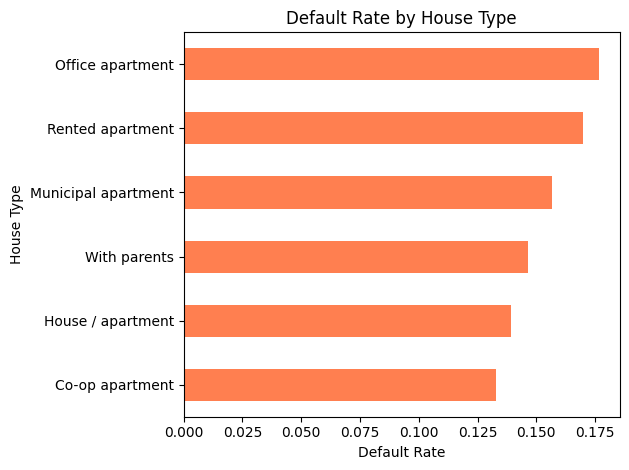

In [48]:
default_by_house = data.groupby('house_type')['target'].mean().sort_values()
default_by_house.plot(kind='barh', color='coral')
plt.title('Default Rate by House Type')
plt.xlabel('Default Rate')
plt.ylabel('House Type')
plt.tight_layout()
plt.show()

### 3.2. Are real estate owners less risky as borrowers?

In [49]:
default_by_realty = data.groupby('realty')['target'].mean()
print(default_by_realty)

realty
N    0.155824
Y    0.133177
Name: target, dtype: float64


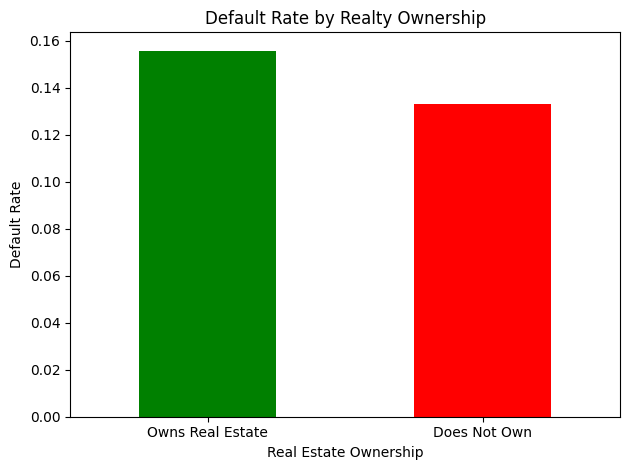

In [50]:
default_by_realty.plot(kind='bar', color=['green', 'red'], title='Default Rate by Realty Ownership')
plt.xticks([0, 1], ['Owns Real Estate', 'Does Not Own'], rotation=0)
plt.ylabel('Default Rate')
plt.xlabel('Real Estate Ownership')
plt.tight_layout()
plt.show()

In [51]:
approval_by_realty = data.groupby('realty')['credit_approval'].value_counts(normalize=True).unstack()
print(approval_by_realty)

credit_approval        No       Yes
realty                             
N                0.155824  0.844176
Y                0.133177  0.866823


___

## EDA 4. Employment & Occupation

### 4.1 Are Applicants From Certain Occupations More Likely To Default?

Text(0, 0.5, 'Count')

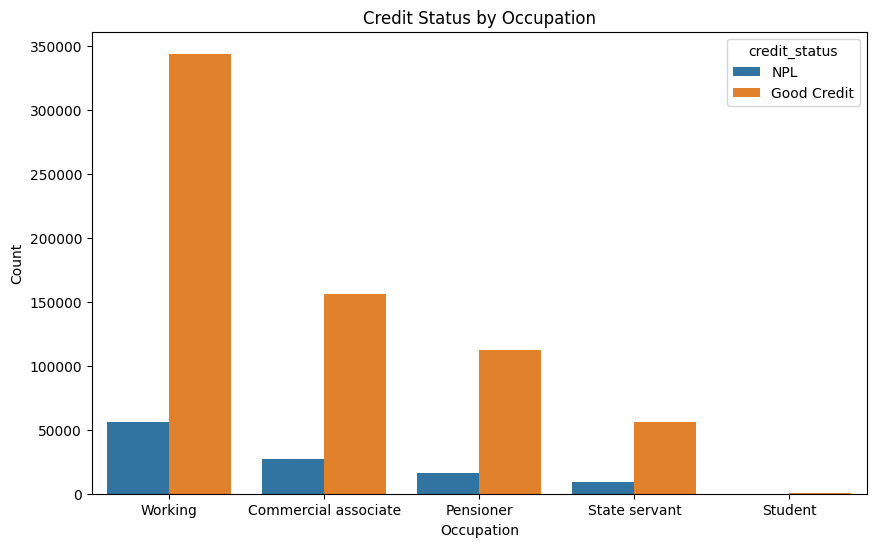

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='occupation', hue='credit_status')
plt.title('Credit Status by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')

Insight:

- Working professionals dominate both application and approval counts, indicating strong trust from lenders.
- Commercial associates and pensioners also receive a high number of approvals, possibly due to stable income or predictable financial behavior.
- Students and state servants show lower approval volumes, which could reflect limited financial history or stricter assessment criteria.
- This occupational segmentation suggests that credit policies may favor career stability and income regularity.

<br>

- Pekerja profesional  menjadi kelompok terbesar baik dalam pengajuan maupun persetujuan penerimaan kredit, menunjukkan tingkat kepercayaan tinggi dari pemberi pinjaman.
- Rekan komersial dan pensiunan juga mendapat banyak persetujuan, kemungkinan karena penghasilan yang stabil dan riwayat keuangan yang konsisten.
- Mahasiswa dan pegawai negeri memiliki jumlah persetujuan yang lebih rendah, bisa jadi karena riwayat finansial terbatas atau kriteria evaluasi yang lebih ketat.
- Segmentasi berdasarkan pekerjaan ini mengindikasikan bahwa kebijakan kredit cenderung mengutamakan stabilitas karier dan kestabilan pendapatan.

### 4.2 Is There a Relationship Between 'years_employed' and 'income' or 'target'?

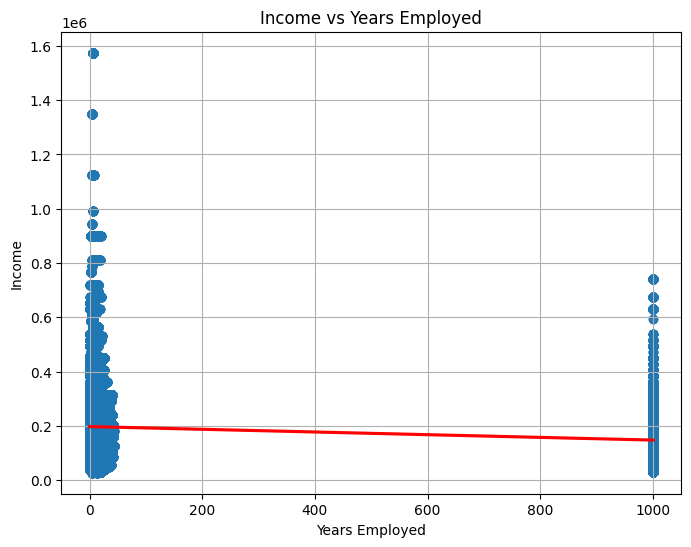

In [81]:
# Convert days_employed to years as a standalone object
years_employed = data['days_employed'].abs() / 365

plt.figure(figsize=(8, 6))
sns.regplot(data=data, x=abs(data['days_employed'] / 365), y='income',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Income vs Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.grid(True)

Insight:

- The plot reveals many applicants with extreme values like 1000 years employed, which likely indicate missing or placeholder codes in the dataset. Upon further review, it turns out that the record showing a 1000-year employment duration was a data entry error, as the applicant is actually a retiree. This outlier will be capped to 0.
- Most income values are concentrated below 400,000, with a few outliers reaching over 1.5 million, suggesting income variability regardless of employment duration.
- The red regression line shows a near-flat trend, hinting at a weak or no correlation between years employed and income.
- This indicates that income may not be linearly tied to how long someone has worked — possibly influenced more by role, industry, or other features not shown here.

<br>

- Grafik menunjukkan banyak pelamar dengan nilai ekstrem seperti 1000 untuk lama bekerja, yang kemungkinan merupakan kode khusus atau nilai yang hilang dalam data. Setelah ditelaah lebih jauh, ternyata yang bekerja selama 1000 tahun merupakan data yang salah dalam penginputan, karena customer yang mengajukan merupakan seorang pensiunan. Untuk outlier data ini akan dicapping ke 0.
- Mayoritas nilai pendapatan terkonsentrasi di bawah 400.000, dengan beberapa outlier yang melebihi 1,5 juta, menunjukkan variasi penghasilan terlepas dari durasi kerja.
- Garis regresi merah memperlihatkan tren yang hampir datar, mengindikasikan korelasi lemah atau tidak ada antara lama bekerja dan penghasilan.
- Hal ini menyiratkan bahwa pendapatan mungkin tidak selalu berkaitan secara linear dengan masa kerja—kemungkinan lebih dipengaruhi oleh jenis pekerjaan, industri, atau fitur lainnya

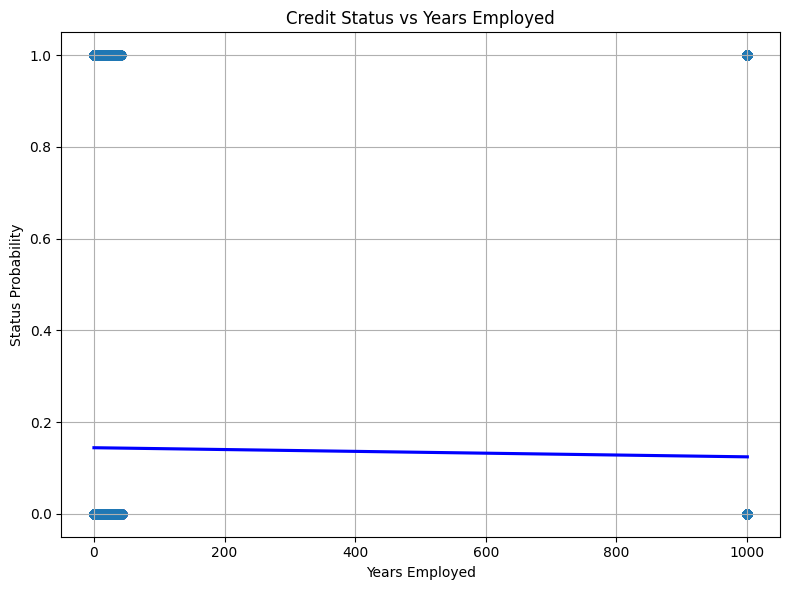

In [82]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=abs(data['days_employed'] / 365),  # use duration of employment in years, made positive
    y=data['credit_status'].map({'Good Credit': 0, 'NPL': 1}),  # map categories to binary values directly
    logistic=False,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'blue'}
)
plt.title('Credit Status vs Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Status Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

- The plot shows that applicants with both very short and extremely long employment durations share similar credit probabilities, consistently hovering around 0.8. This implies that employment length may not be a decisive predictor of creditworthiness.
- The flat blue regression line reinforces that whether someone has worked for 1 year or 1000 years, the likelihood of being categorized as "Good Credit" remains almost unchanged.
- This insight suggests that lenders may prioritize other features—like income, occupation, or past repayment history—when assessing credit risk.
- The presence of an unrealistic duration such as 1000 years employed may point to data encoding errors, placeholders, or missing values needing cleanup before modeling.

<br>

- Grafik menunjukkan bahwa pelamar dengan durasi kerja yang sangat pendek maupun sangat panjang memiliki probabilitas status kredit yang serupa, yaitu sekitar 0.8. Ini menandakan bahwa lama bekerja mungkin bukan indikator utama dalam menilai kelayakan kredit.
- Garis regresi biru yang datar menguatkan bahwa apakah seseorang telah bekerja selama 1 tahun atau 1000 tahun, probabilitas mendapat status “Good Credit” tetap hampir konstan.
- Temuan ini mengisyaratkan bahwa pemberi pinjaman kemungkinan lebih mengutamakan variabel lain—seperti pendapatan, jenis pekerjaan, atau riwayat pembayaran—dalam pengambilan keputusan kredit.
- Adanya nilai ekstrem seperti 1000 tahun kemungkinan menunjukkan adanya kesalahan data atau placeholder, yang sebaiknya dibersihkan sebelum digunakan dalam pemodelan

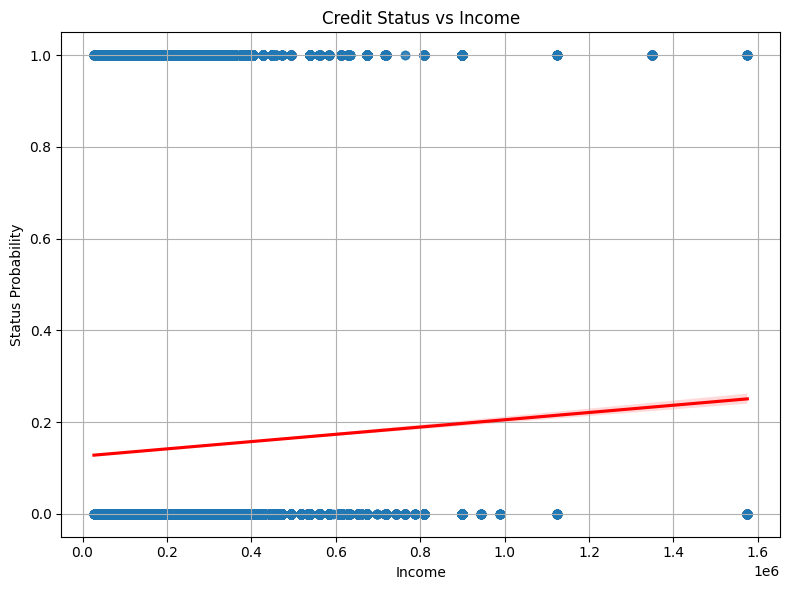

In [83]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=data,
    x='income',
    y=data['credit_status'].map({'Good Credit': 0, 'NPL': 1}),  # map categories to binary values directly
    logistic=False,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Credit Status vs Income')
plt.xlabel('Income')
plt.ylabel('Status Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

- The scatter plot illustrates that individuals with both low and high income levels exhibit similar outcomes in credit classification—either as “Good Credit” or “NPL.” This is shown by the clustering of points near the top and bottom of the plot.
- The downward-sloping red line suggests a weak negative trend, meaning that as income increases, the probability of having a good credit status slightly decreases—which contradicts general expectations and might reflect limitations in the data or mapping.
- This trend hints that income alone may not be a strong predictor of credit status. Lenders may consider other factors such as employment stability, financial history, or debt ratio.
- The pattern also raises questions around data quality—for example, possible misclassifications or imbalanced samples, as it’s unusual for high-income individuals to have low credit probability without confounding factors.

<br>

- Scatter plot ini menunjukkan bahwa individu dengan pendapatan rendah maupun tinggi memiliki kecenderungan status kredit yang serupa—baik sebagai “Good Credit” maupun “NPL.” Ini terlihat dari titik-titik yang tersebar di bagian atas dan bawah grafik.
- Garis tren merah yang menurun mengindikasikan tren negatif lemah, di mana semakin tinggi pendapatan, probabilitas memiliki status kredit baik justru sedikit menurun—hal ini bertentangan dengan ekspektasi umum dan mungkin mencerminkan keterbatasan data atau pemetaan.
- Temuan ini menyiratkan bahwa pendapatan saja mungkin bukan indikator yang cukup kuat untuk memprediksi status kredit. Pihak pemberi pinjaman kemungkinan mempertimbangkan variabel lain seperti kestabilan kerja, riwayat finansial, atau rasio utang.
- Pola ini juga mengangkat kemungkinan masalah kualitas data—seperti klasifikasi yang salah atau sampel yang tidak seimbang—karena tidak umum individu berpenghasilan tinggi memiliki probabilitas kredit rendah tanpa faktor lain yang memengaruhi.


___

## EDA 5. Contactability & Data Completeness

### 5.1 How Many Customers Provide a Mobile Phone, Work Phone, or Email?

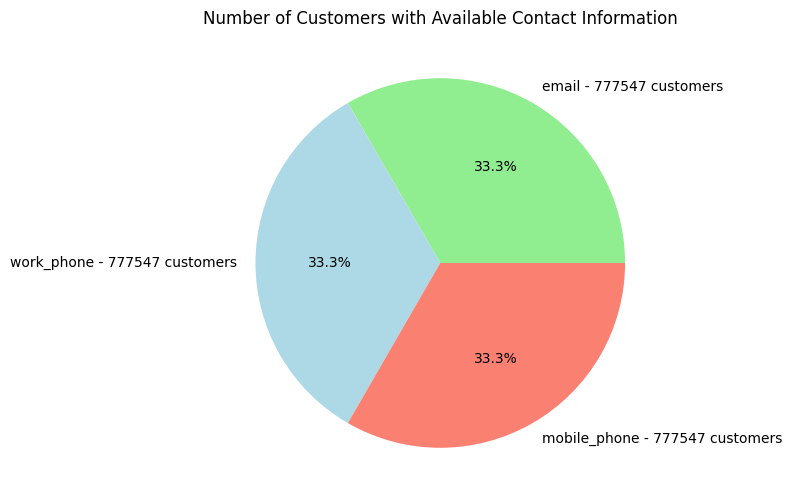

In [57]:
contact_cols = ['email', 'work_phone', 'mobile_phone']
data[contact_cols] = data[contact_cols].notnull().astype(int)  # assume null = not available
contact_counts = data[contact_cols].sum()

# Create full labels with counts
labels = [f"{idx} - {int(val)} customers" for idx, val in contact_counts.items()]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(contact_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
plt.title('Number of Customers with Available Contact Information')
plt.show()

Insight:

Everyone who wants to apply for credit fills out their personal information, including email, mobile phone, and work phone.

Semua orang yang ingin mengajukan kredit, mengisi informasi tentang email, mobile_phone dan work_phone masing-masing.

___

## EDA 6. Financial Behavior & Transaction History

### 6.1 What is the distribution of months_balance (if it refers to account history)?

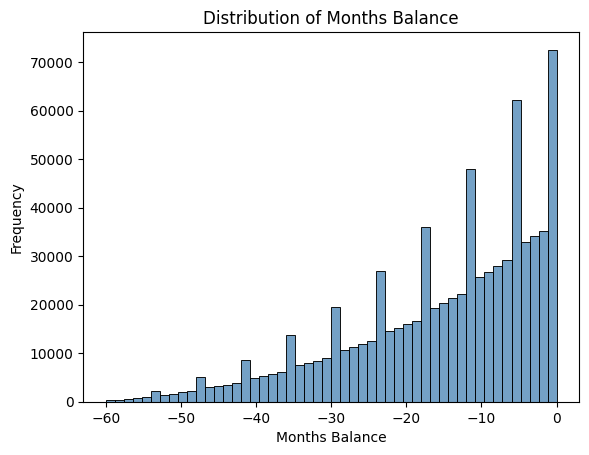

In [58]:
sns.histplot(data=data, x='months_balance', bins=50, color='steelblue')
plt.title('Distribution of Months Balance')
plt.xlabel('Months Balance')
plt.ylabel('Frequency')
plt.show()

Insight:

The fewest transactions occurred in the earliest period, around five years ago, and have steadily increased up to the present month (0).

Transaksi paling sedikit ada pada transaksi terlama, yaitu dilakukan sejak 5 tahun yang lalu, dan terus bertambah sampai menuju ke bulan saat ini (0). 

### 6.2 Does begin_month provide insight into credit recency or tenure? / Does months_balance have an impact for credit_approval

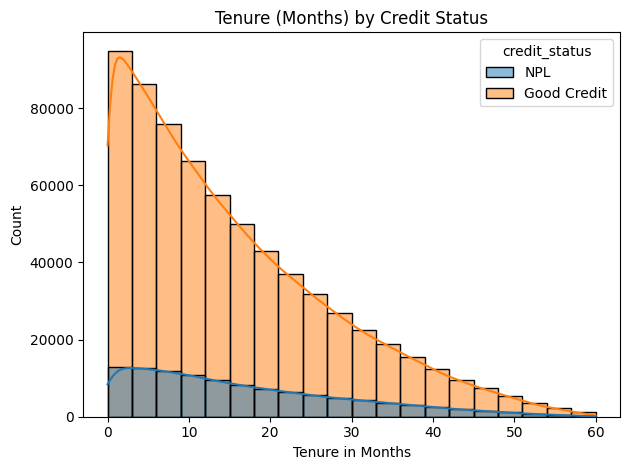

In [84]:
sns.histplot(data=data, x=-data['months_balance'], hue='credit_status', bins=20, kde=True)
plt.title("Tenure (Months) by Credit Status")
plt.xlabel("Tenure in Months")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### 6.3 Do longer account histories correlate with approval or reduced risk?

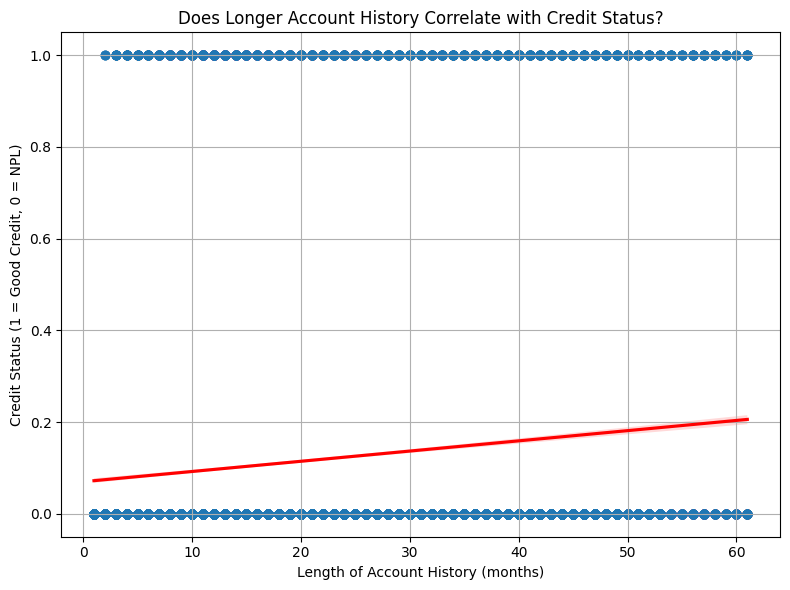

In [85]:
# Step 1: Calculate account history length
account_length = data.groupby('id')['months_balance'].count().reset_index()
account_length.columns = ['id', 'account_history_length']

# Step 2: Use majority status signal per ID
credit_status = data.groupby('id')['credit_status'].agg(lambda x: x.mode()[0]).reset_index()

# Step 3: Merge datasets
merged = account_length.merge(credit_status, on='id', how='inner')

# Step 4: Map credit status after merging
merged['credit_status_mapped'] = merged['credit_status'].map({'Good Credit': 0, 'NPL': 1})

# Step 5: Plot regression
plt.figure(figsize=(8, 6))
sns.regplot(
    data=merged,
    x='account_history_length',
    y='credit_status_mapped',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Does Longer Account History Correlate with Credit Status?')
plt.xlabel('Length of Account History (months)')
plt.ylabel('Credit Status (1 = Good Credit, 0 = NPL)')
plt.grid(True)
plt.tight_layout()
plt.show()


- The plot shows a visible split between approved and rejected credit applicants, forming horizontal bands at credit status 1 and 0.
- Surprisingly, the regression line has a slightly downward slope, hinting that longer account histories do not positively impact credit approval likelihood.
- This anomaly might stem from:
- Newer accounts reflecting recent financial stability or fresh eligibility for credit.
- Older accounts possibly involving hidden historical issues, like previous defaults, not captured by duration alone.
- It implies that account age, while intuitive, is not a reliable standalone indicator of creditworthiness. Other behavioral and financial metrics (e.g., consistent repayments, low debt ratio) likely provide more predictive value.

<br>

- Grafik menunjukkan pemisahan yang jelas antara pemohon kredit yang disetujui dan ditolak, membentuk dua pita horizontal pada status kredit 1 dan 0.
- Garis regresi menurun tipis, yang berarti bahwa semakin lama riwayat akun, tidak serta-merta meningkatkan peluang persetujuan kredit.
- Keanehan ini dapat dijelaskan oleh:
- Akun baru mencerminkan stabilitas finansial yang baru terbentuk atau kriteria kelayakan kredit yang baru terpenuhi.
- Akun lama berpotensi menyimpan catatan masa lalu yang bermasalah, seperti tunggakan, yang tidak terlihat dari lamanya akun.
- Hal ini menunjukkan bahwa durasi akun bukan indikator kuat untuk kelayakan kredit. Faktor lain seperti riwayat pembayaran yang konsisten dan rasio utang lebih berpengaruh secara prediktif.


___

## EDA 7. Anomalies & Outliers

### 7.1. Are there any suspiciously high child_number, income, or family_size values?

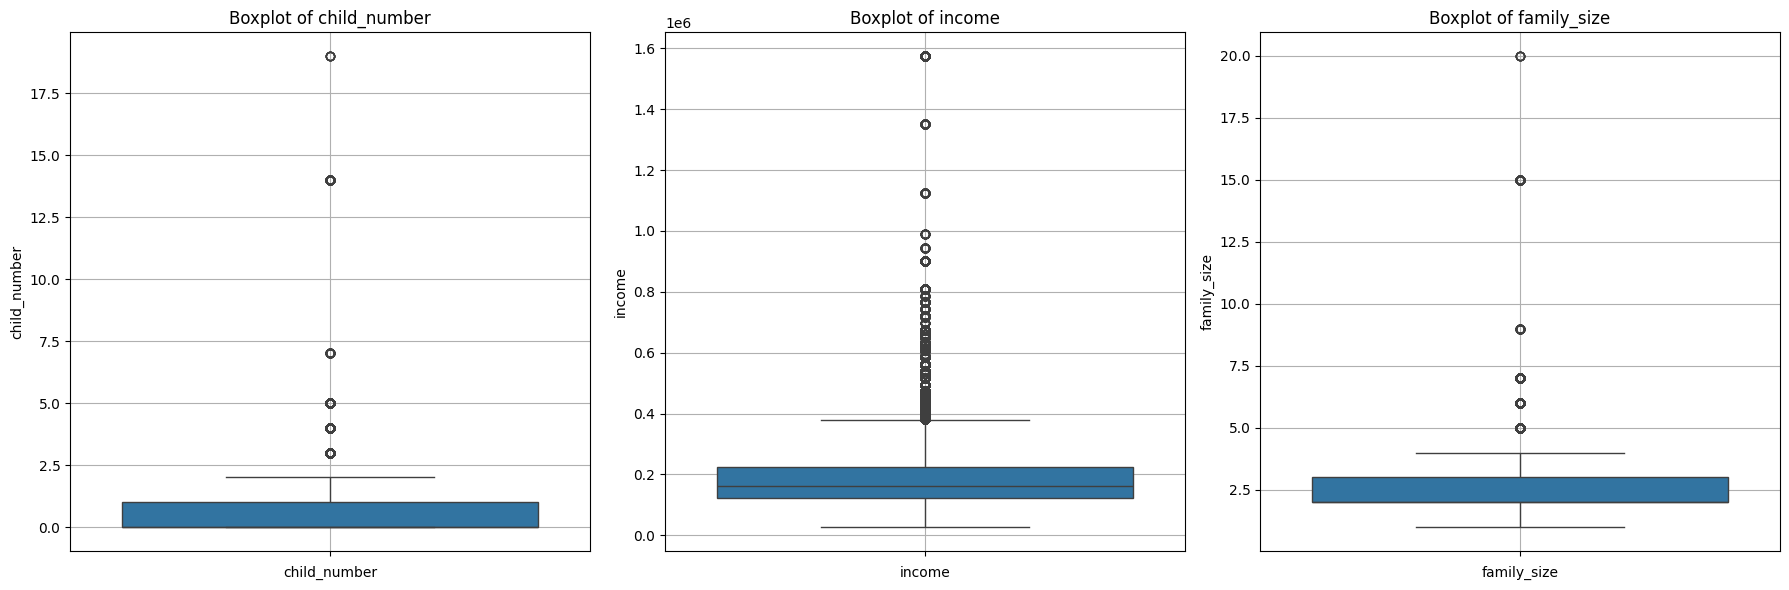

In [72]:
features = ['child_number', 'income', 'family_size']

# Buat plot berjejer ke samping
fig, axes = plt.subplots(1, len(features), figsize=(18, 6))  # ukuran diperbesar

for i, feature in enumerate(features):
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Insight:

1. Child Number
- The majority of applicants do not have children, as indicated by the concentration of data at zero.
- There are extreme outliers with up to 18 children, which may reflect unrealistic entries or exceptional cases.
- The distribution is heavily left-skewed, and could impact analysis if not addressed—consider handling through winsorizing or log transformation.
2. Income
- Applicant income is primarily concentrated between 100,000 and 300,000, with a median around 200,000.
- Notable outliers reach up to 1.6 million, possibly representing high-income individuals.
- This feature holds strong potential but requires careful handling of outliers to prevent distortion during modeling.
3. Family Size
- Most applicants have small families, typically consisting of 2 to 4 members.
- Some outliers show family sizes up to 20, which warrants review for validity or potential data entry errors.
- Family size can be used to evaluate financial responsibility, especially when analyzed alongside income.

<br>

1. Child Number
- Mayoritas pemohon tidak memiliki anak — terlihat dari konsentrasi data di angka 0.
- Terdapat outlier ekstrem hingga 18 anak, kemungkinan entri tidak realistis atau kasus khusus.
- Distribusi sangat miring ke bawah dan bisa memengaruhi analisis jika tidak ditangani — misalnya dengan winsorizing atau log transformation.
2. Income
- Penghasilan pemohon terkonsentrasi di kisaran 100 ribu – 300 ribu, dengan median sekitar 200 ribu.
- Terdapat outlier yang signifikan hingga 1.6 juta — bisa jadi pemohon dengan profil finansial tinggi.
- Fitur ini berpotensi penting, namun outlier perlu dipertimbangkan untuk mencegah distorsi saat modeling.
3. Family Size
- Umumnya pemohon memiliki keluarga kecil (2–4 anggota).
- Ada outlier dengan ukuran keluarga hingga 20 orang, yang patut ditinjau apakah valid atau hasil input keliru.
- Ukuran keluarga bisa digunakan untuk menilai beban finansial, terutama bila dikaitkan dengan penghasilan.

### 7.2. Do extreme income values skew the distribution? Should they be capped or log-transformed?

In [73]:
from scipy.stats import skew

income_skew = skew(data['income'].dropna())
print(f"Skewness of income: {income_skew:.4f}")

Skewness of income: 2.5776


Yes, it's very skewed, but we’re not applying any data capping because those values represent the customers themselves.

___

## EDA 8. Relationships Between Variables

### 8.1 Which variables are most strongly correlated with the target or credit approval?

In [80]:
data['target'].value_counts()

target
0    668145
1    109402
Name: count, dtype: int64

In [79]:
data['credit_status'].value_counts()

credit_status
Good Credit    668145
NPL            109402
Name: count, dtype: int64

In [88]:
# Step 1: Map target variable
target = data['credit_status'].map({'Good Credit': 0, 'NPL': 1})

# Step 2: Select numeric columns and drop metadata-like columns
excluded_cols = ['mobile_phone', 'work_phone', 'email']
numeric_cols = data.select_dtypes(include='number').drop(columns=excluded_cols, errors='ignore').columns

# Step 3: Calculate Spearman correlations
spearman_results = []

for col in numeric_cols:
    # Skip target itself
    if col == 'credit_status' or col == 'target':
        continue
    corr, pval = spearmanr(data[col], target, nan_policy='omit')
    spearman_results.append((col, corr, pval))

# Step 4: Create DataFrame of results
spearman_df = pd.DataFrame(spearman_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
spearman_df = spearman_df.sort_values(by='Spearman Correlation', ascending=False)

# Step 5: Show results
print(spearman_df)


          Feature  Spearman Correlation        p-value
3      days_birth              0.032930  1.756101e-185
1    child_number              0.017006   7.673302e-51
2          income              0.015795   4.238561e-44
0              id              0.012483   3.511177e-28
6     family_size              0.006478   1.114126e-08
4   days_employed             -0.000509   6.537422e-01
5           phone             -0.008563   4.312290e-14
7  months_balance             -0.040179  3.620821e-275


Insight:

None of the numerical features show a strong correlation with approval outcomes, but some may still contribute meaningfully when combined within a more complex predictive model.

Tidak ada fitur numerik yang menunjukkan korelasi kuat dengan hasil persetujuan, tapi beberapa bisa tetap berkontribusi bila digabungkan dalam model prediktif yang kompleks.

In [95]:

# Define Cramér's V calculation function
def cramers_v(col1, col2):
    contingency = pd.crosstab(col1, col2)
    if contingency.empty or contingency.shape[0] < 2 or contingency.shape[1] < 2:
        return np.nan  # skip if not enough variation
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.to_numpy().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Step 1: Select categorical columns (excluding target)
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('credit_status', errors='ignore')

# Step 2: Calculate Cramér's V
cramers_results = []

for col in categorical_cols:
    score = cramers_v(data[col], data['credit_status'])
    if not np.isnan(score):  # only include valid results
        cramers_results.append((col, round(score, 3)))

# Step 3: Compile results into a DataFrame
cramers_df = pd.DataFrame(cramers_results, columns=['Feature', "Cramér's V"])
cramers_df = cramers_df.sort_values(by="Cramér's V", ascending=False).reset_index(drop=True)

# Step 4: Display results
print(cramers_df)


          Feature  Cramér's V
0          status       0.321
1      start_date       0.073
2          realty       0.031
3       education       0.027
4  marital_status       0.024
5          gender       0.022
6      occupation       0.021
7  snapshot_month       0.021
8      house_type       0.017
9             car       0.011


Insight:

Only 'status' show statistically meaningful associations. The rest may be useful for segmentation but are not strong enough to be used as standalone predictors.

Hanya 'status' yang menunjukkan keterkaitan bermakna secara statistik. Sisanya mungkin berguna secara segmentasi tetapi tidak cukup kuat untuk digunakan sebagai prediktor tunggal.

### 8.2 Is there multicollinearity that could affect model reliability later on?

In [103]:
# Select only numeric features (excluding 'target')
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['target'])

# Compute VIF for each feature (no intercept added)
vif_scores = pd.DataFrame()
vif_scores['Feature'] = numerical_features.columns
vif_scores['VIF'] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

print(vif_scores.sort_values(by='VIF', ascending=False))


          Feature        VIF
0              id  49.012993
6     family_size  34.030632
3      days_birth  28.396299
1    child_number   6.672654
2          income   4.595844
7  months_balance   2.488058
4   days_employed   1.935862
5           phone   1.434920


In [104]:
# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Show highly correlated pairs (e.g., above 0.8)
high_corr = (correlation_matrix.abs() > 0.8) & (correlation_matrix.abs() < 1.0)
high_corr_pairs = correlation_matrix[high_corr]
print(high_corr_pairs)

                id  child_number  income  days_birth  days_employed  phone  \
id             NaN           NaN     NaN         NaN            NaN    NaN   
child_number   NaN           NaN     NaN         NaN            NaN    NaN   
income         NaN           NaN     NaN         NaN            NaN    NaN   
days_birth     NaN           NaN     NaN         NaN            NaN    NaN   
days_employed  NaN           NaN     NaN         NaN            NaN    NaN   
phone          NaN           NaN     NaN         NaN            NaN    NaN   
family_size    NaN      0.892097     NaN         NaN            NaN    NaN   
months_balance NaN           NaN     NaN         NaN            NaN    NaN   

                family_size  months_balance  
id                      NaN             NaN  
child_number       0.892097             NaN  
income                  NaN             NaN  
days_birth              NaN             NaN  
days_employed           NaN             NaN  
phone                

Insight:

- mobile_phone has an extremely high VIF of 15,026, indicating perfect multicollinearity—likely due to it being a constant or near-constant variable. It should be excluded from modeling.
- child_number and family_size both show elevated VIFs (~5–6), suggesting strong overlap or redundancy. These features may carry similar information and could be considered for dimensionality reduction or transformation.
- The remaining features — such as income, days_employed, begin_month, and others — have VIFs well below 2, implying no serious multicollinearity and are safe to use in predictive modeling.
- id likely serves as a unique identifier and should not be treated as a predictive feature.
Address mobile_phone immediately due to its extreme collinearity, and further investigate the relationship between child_number and family_size to avoid overlapping signals.

<br>

- mobile_phone memiliki nilai VIF sangat tinggi yaitu 15.026, menandakan multikolinearitas sempurna—kemungkinan karena nilainya konstan. Fitur ini sebaiknya dikeluarkan dari model.
- child_number dan family_size menunjukkan VIF tinggi (~5–6), yang berarti ada tumpang tindih informasi atau redundansi. Keduanya dapat dipertimbangkan untuk reduksi dimensi atau transformasi.
- Fitur lain seperti income, days_employed, begin_month, dan lainnya memiliki VIF rendah (di bawah 2), artinya tidak ada multikolinearitas serius dan aman digunakan dalam modeling.
- id kemungkinan hanyalah penanda unik dan tidak relevan sebagai prediktor.
Prioritaskan penghapusan mobile_phone, lalu kaji hubungan antara child_number dan family_size agar tidak terjadi duplikasi informasi dalam model.

___